Antonnia Abdul
Data Science:Task 21
student no: AN24020013912

See Task 21 futher in this notebook

In [303]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from sklearn.tree import export_graphviz
from subprocess import call

In [304]:
titanic_df = pd.read_csv("titanic.csv",index_col=0)
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [305]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [306]:
# You can also drop whichever other columns you'd like here
titanic_df.drop(['Cabin','Name','Ticket'], axis=1, inplace=True)
titanic_df.head(6)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
6,0,3,male,NaN,0,0,8.4583,Q


In [307]:
#addressing null values for 'Age' parameter using previous row. add why?
titanic_df = titanic_df.ffill(axis=0)
titanic_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### One-Hot Encoding
One-hot encoding is a technique used to ensure that categorical variables are better represented in the machine. Let's take a look at the "Sex" column

In [308]:
titanic_df["Sex"].unique()

array(['male', 'female'], dtype=object)

Machine Learning classifiers don't know how to handle strings. As a result, you need to convert it into a categorical representation. There are two main ways to go about this:

Label Encoding: Assigning, for example, 0 for "male" and 1 for "female". The problem here is it intrinsically makes one category "larger than" the other category.

One-hot encoding: Assigning, for example, [1, 0] for "male" and [0, 1] for female. In this case, you have an array of size (n_categories,) and you represent a 1 in the correct index, and 0 elsewhere. In Pandas, this would show as extra columns. For example, rather than having a "Sex" column, it would be a "Sex_male" and "Sex_female" column. Then, if the person is male, it would simply show as a 1 in the "Sex_male" column and a 0 in the "Sex_female" column.

There is a nice and easy method that does this in pandas: get_dummies()

In [309]:
titanic_df = pd.get_dummies(titanic_df, prefix="Sex", columns=["Sex"])
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
PassengerId,,,,,,,,,
1,0,3,22.0,1,0,7.2500,S,False,True
2,1,1,38.0,1,0,71.2833,C,True,False
3,1,3,26.0,0,0,7.9250,S,True,False
4,1,1,35.0,1,0,53.1000,S,True,False
5,0,3,35.0,0,0,8.0500,S,False,True


Now, we do the same to the "Embarked" column.

In [310]:
titanic_df = pd.get_dummies(titanic_df, prefix="Embarked", columns=["Embarked"])
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,False,True,False,False,True
2,1,1,38.0,1,0,71.2833,True,False,True,False,False
3,1,3,26.0,0,0,7.9250,True,False,False,False,True
4,1,1,35.0,1,0,53.1000,True,False,False,False,True
5,0,3,35.0,0,0,8.0500,False,True,False,False,True


In [311]:
#define X and y

X = titanic_df.iloc[:,[ 1, 2, 3, 4, 5, 6, 7,8,9,10]].values  #Independent variables
y = titanic_df.iloc[:,[0]].values                      #Dependent variables

In [312]:
#spliting data into test and training data
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#spliting data into training and development data
X_train, X_dev, y_train, y_dev = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

In [313]:
# training a model without pruning
unpruned = DecisionTreeClassifier(max_depth= None, random_state=42)
unpruned.fit(X_train, y_train)

print("Performance without pruning:", unpruned.score(X_test, y_test))
print("At depth:", unpruned.tree_.max_depth)

Performance without pruning: 0.7130044843049327
At depth: 17


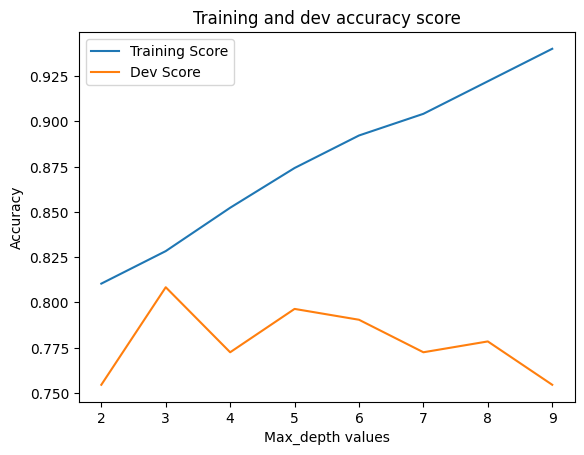

In [314]:
# looking at effect of pruning   
max_depths = range(2,10)

training_accuracy_scores = [] 
dev_accuracy_scores = []
for d in max_depths:
  clf = DecisionTreeClassifier(max_depth=d, random_state=42)
  clf.fit(X_train, y_train)
  scoreT = clf.score(X_train, y_train)
  scoreD = clf.score(X_dev, y_dev)
  training_accuracy_scores.append(scoreT)
  dev_accuracy_scores.append(scoreD)


#fig, ax = plt.subplots()
plt.plot(max_depths,training_accuracy_scores,label = "Training Score")
plt.plot(max_depths,dev_accuracy_scores,label = "Dev Score")

plt.xlabel("Max_depth values")
plt.ylabel("Accuracy")

plt.legend()
plt.title('Training and dev accuracy score')
plt.show()

choosing max_depth = 6 because after 6 dev score experiences a decline

In [315]:
print("Taining score",training_accuracy_scores)

print("Dev score",dev_accuracy_scores)

Taining score [0.810379241516966, 0.8283433133732535, 0.8522954091816367, 0.874251497005988, 0.8922155688622755, 0.9041916167664671, 0.9221556886227545, 0.9401197604790419]
Dev score [0.7544910179640718, 0.8083832335329342, 0.7724550898203593, 0.7964071856287425, 0.7904191616766467, 0.7724550898203593, 0.7784431137724551, 0.7544910179640718]


In [316]:
# training a model without pruning
max_depth= 6
final_model_score= DecisionTreeClassifier(max_depth= max_depth, random_state=42)
final_model_score.fit(X_train, y_train)

y_pred= final_model_score.predict(X_test)

final_score = accuracy_score(y_test, y_pred)
print("Performance of model:",final_score)

print("At depth:", final_model_score.tree_.max_depth)

Performance of model: 0.7892376681614349
At depth: 6


------------------------------------------------------------------------------------------------------------------------------------------

**Task 21: Decision Tree Continued**

In [317]:
import seaborn as sns
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree

In [318]:
#Base decision Tree

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

print(f"Testing accuracy for base decision tree model: {accuracy_score(y_test, y_pred_tree)}")

Testing accuracy for base decision tree model: 0.7130044843049327


In [319]:
#bagging classifier

bag_clf = BaggingClassifier(
    estimator = DecisionTreeClassifier(max_depth= 6),n_estimators=100, random_state=42)
  
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

bagging_model = print(f"bagging model: {bag_clf.score(X_test,y_test)}")
print(f"Testing accuracy score for bagging model: {accuracy_score(y_test, y_pred)}")

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_bagging.py:782: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


bagging model: 0.7937219730941704
Testing accuracy score for bagging model: 0.7937219730941704


In [320]:
#Boost Tree Classifier 

boost_clf = AdaBoostClassifier(n_estimators=100, random_state=42)
  
boost_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

print(f"boosting model: {bag_clf.score(X_test,y_test)}")
print(f"Testing accuracy for boosting model: {accuracy_score(y_test, y_pred)}")

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


boosting model: 0.7937219730941704
Testing accuracy for boosting model: 0.7937219730941704


In [321]:
#Random Forest

random_clf = RandomForestClassifier(max_depth= 6,n_estimators=100,random_state=42)
random_clf.fit(X_train, y_train)

y_pred = random_clf.predict(X_test)

print(f"random forest model : {random_clf.score(X_test,y_test)}")
print(f"Testing accuracy for random forest model: {accuracy_score(y_test, y_pred)}")

random forest model : 0.8116591928251121
Testing accuracy for random forest model: 0.8116591928251121


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


-------------------------------------------------------------------------------------------------------------------------------------------

**Feature Importance**

In [322]:
#Feature importance
#Finding the important features using the built-in Gini importance

X = titanic_df.drop(columns=['Survived'])
feature_names = X.columns


In [323]:

#Finding the important features using the built-in Gini importance
importances = random_clf.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Gini Importance': importances}).sort_values('Gini Importance', ascending=False)
feature_imp_df

,Feature,Gini Importance
6,Sex_male,0.229493
5,Sex_female,0.198725
4,Fare,0.164452
1,Age,0.151082
0,Pclass,0.131963
2,SibSp,0.044080
3,Parch,0.043460
7,Embarked_C,0.016526
9,Embarked_S,0.011866
8,Embarked_Q,0.008352


/var/folders/69/fk1rnj0n5332n9gfx9tkb_rw0000gn/T/ipykernel_73475/141431634.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_imp_df['Gini Importance'],y=feature_imp_df['Feature'],data=feature_imp_df,


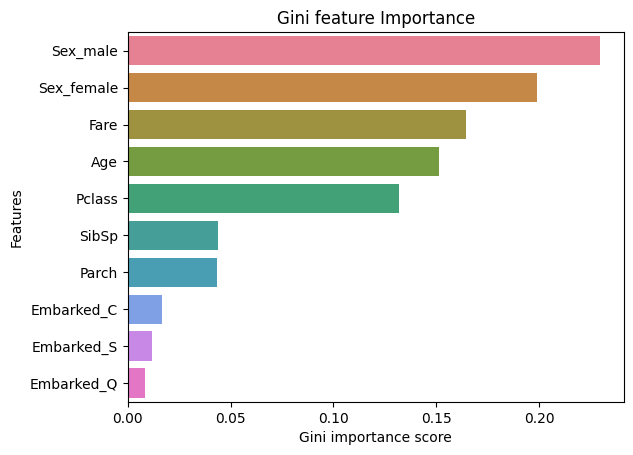

In [324]:
# Creating a seaborn bar plot of the gini importance 

sns.barplot(x=feature_imp_df['Gini Importance'],y=feature_imp_df['Feature'],data=feature_imp_df,
               palette="husl")

plt.title("Gini feature Importance")
plt.xlabel("Gini importance score")
plt.ylabel("Features")
plt.show()

Determining which of the features is the one that contributes the most to predicting whether a passenger survives or not. 

Based on this output of the gini importance, it can be concluded that the features: Sex_male, Sex_female, fare, and age are most predictive of passenger survival. This also aligns with the speculation of the titanic story that the young and females were given preferential treatment for survival on the lifeboats. 

*Permutation feature importance and visualisation*

In [325]:
# Permutation feature importance

result = permutation_importance(random_clf, X_test, y_test, n_repeats=10, random_state=0)
perm_imp_df = pd.DataFrame({'Feature': feature_names, 'Permutation Importance': result.importances_mean}).sort_values('Permutation Importance', ascending=False)
perm_imp_df

,Feature,Permutation Importance
0,Pclass,0.086996
6,Sex_male,0.055605
5,Sex_female,0.033184
1,Age,0.017040
4,Fare,0.012556
8,Embarked_Q,0.009865
3,Parch,0.008969
2,SibSp,0.006726
7,Embarked_C,0.004933
9,Embarked_S,0.003587


/var/folders/69/fk1rnj0n5332n9gfx9tkb_rw0000gn/T/ipykernel_73475/3298761167.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=perm_imp_df['Permutation Importance'],y=perm_imp_df['Feature'],data=perm_imp_df,


Text(0, 0.5, 'Features')

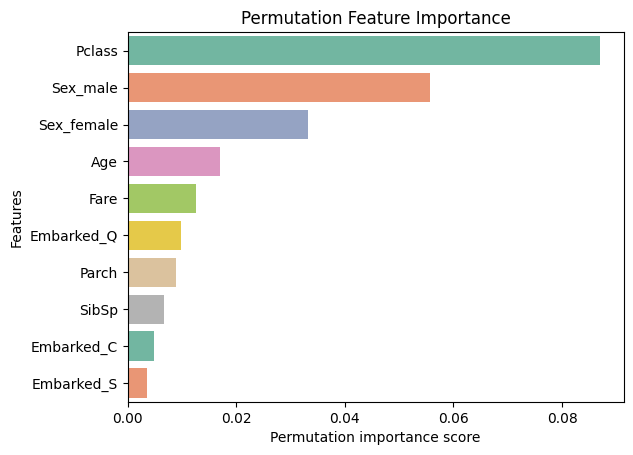

In [326]:
# Creating a seaborn bar plot
sns.barplot(x=perm_imp_df['Permutation Importance'],y=perm_imp_df['Feature'],data=perm_imp_df,
           palette="Set2")

plt.title("Permutation Feature Importance")
plt.xlabel("Permutation importance score")
plt.ylabel("Features")

Comparing the permutation feature importance to the gini importance, both models identified Sex_male, Sex_female, Age and fare as being of importance when determining the passenger survival however the permutation feature gave the Pclass the highest importance. This would imply that passengers in the first and possibly second might have been given preferential treatment for survival oon lifeboats.

-------------------------------------------------------------------------------------------------------------------------------------------

**Hyperparameter Tuning**

In [327]:
# Hyperparameter tuning for Random Forest using GridSearchCV and fit the data.

params = {
    'max_depth': [3,4,5,6],
    'n_estimators': [100,300,400,600]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=random_clf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1,
                           scoring="accuracy")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 16 candidates, totalling 64 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklea

GridSearchCV(cv=4,
             estimator=RandomForestClassifier(max_depth=6, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6],
                         'n_estimators': [100, 300, 400, 600]},
             scoring='accuracy', verbose=1)

In [328]:
#Check best score hyperparameters
print(grid_search.best_score_)
rf_best = grid_search.best_estimator_
rf_best

0.8363174603174603


RandomForestClassifier(max_depth=6, n_estimators=400, random_state=42)

**Visualise as Tree plot**

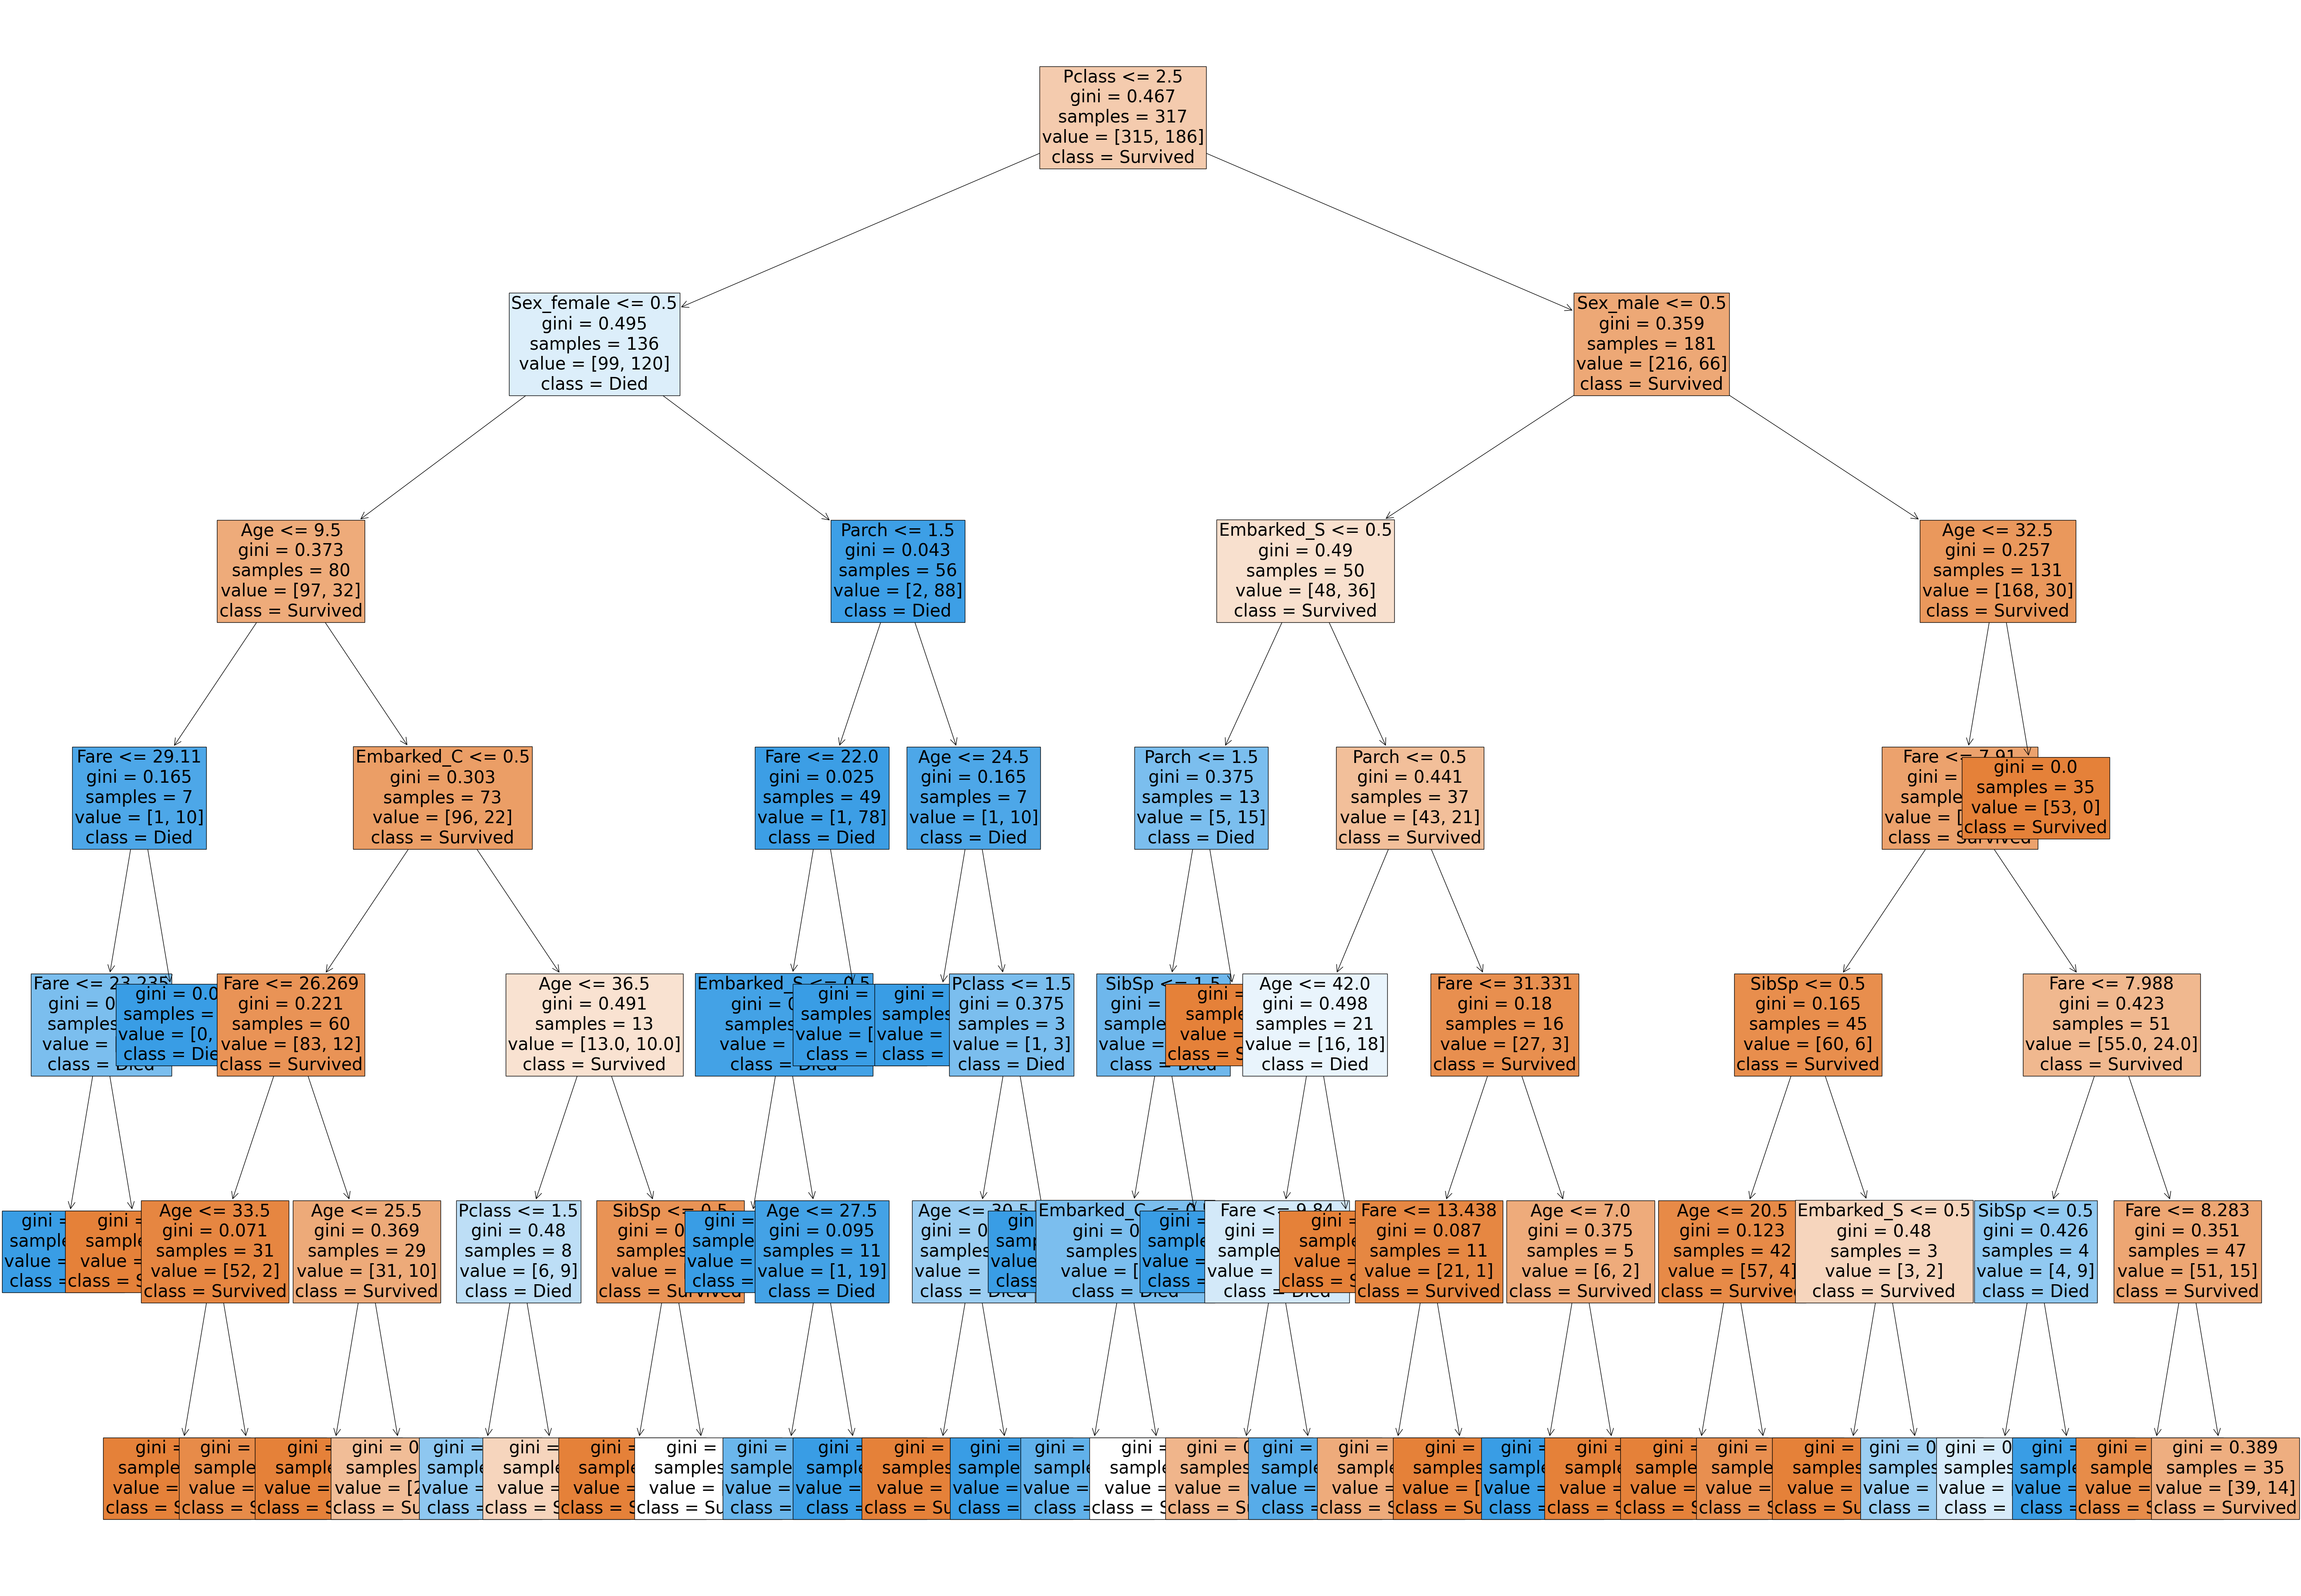

In [329]:
#Plot one tree, e.g. Tree 3
plt.figure(figsize=(70,50))
plot_tree(rf_best.estimators_[3], feature_names = X.columns,class_names=['Survived','Died'],filled=True,fontsize=30)
plt.show()

-------------------------------------------------------------------------------------------------------------------------------------------

**Reporting the accuracy of all models**

In [330]:

print("Testing accuracy for base decision tree model : 0.7130044843049327")
print("Testing accuracy for bagging model : 0.7937219730941704")
print("Testing accuracy for boosting model : 0.7937219730941704")
print("Testing accuracy for random forest model : 0.8116591928251121")
print(f"Testing accuracy for random forest model with hyperparameters: {grid_search.best_score_}")

Testing accuracy for base decision tree model : 0.7130044843049327
Testing accuracy for bagging model : 0.7937219730941704
Testing accuracy for boosting model : 0.7937219730941704
Testing accuracy for random forest model : 0.8116591928251121
Testing accuracy for random forest model with hyperparameters: 0.8363174603174603


Based on the accuracy of all models, the random forest models performed the best of which random forest with hyperparameters performed the best.